In [16]:
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, ZeroPadding2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing import image

## 0. Basics
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

- Loading image
    - Tensors that we have seen so far in MNIST and CIFAR-10 datasets are actually images
    - 3-dimensional arrays can be shown as images using ```plt.imshow()``` 

In [20]:
(x_train, y_train), _ = cifar10.load_data()
print(x_train[0].shape)

(32, 32, 3)


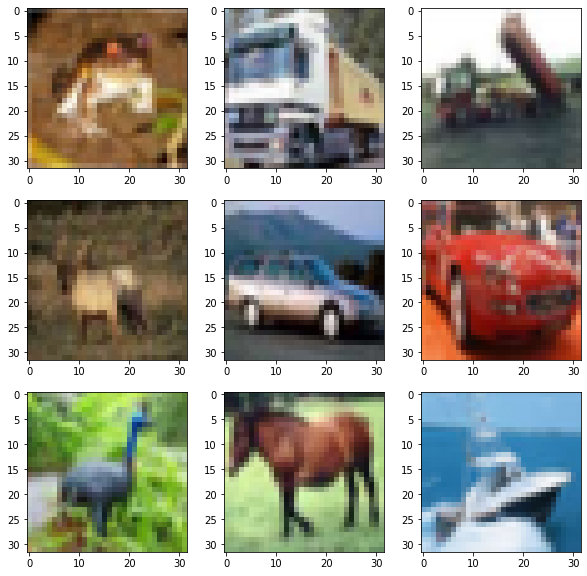

In [14]:
# showing figures
fig = plt.figure(figsize = (10, 10))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.imshow(x_train[i])

plt.show()

In [21]:
(x_train, y_train), _ = mnist.load_data()
print(x_train[0].shape)   # Images in mnist are 2-D since they don't have color channel

(28, 28)


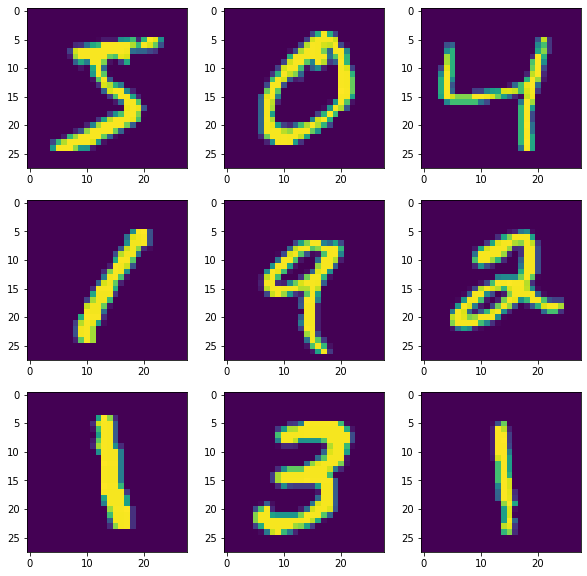

In [22]:
# showing figures
fig = plt.figure(figsize = (10, 10))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.imshow(x_train[i])

plt.show()

## 1. Padding
- Two types of padding options
    - **'valid'**: no padding (drop right-most columns & bottom-most rows)
    - **'same'**: padding size **p = [k/2]** when kernel size = **k**
- Customized paddings can be given with ZeroPadding**n**D layer

In [23]:
# when padding = 'valid'
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

In [24]:
print(model.output_shape)

(None, 8, 8, 10)


In [25]:
# when padding = 'same'
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [26]:
print(model.output_shape)

(None, 10, 10, 10)


In [27]:
# user-customized padding
input_layer = Input(shape = (10, 10, 3))
padding_layer = ZeroPadding2D(padding = (1,1))(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

In [28]:
print(model.output_shape)

(None, 12, 12, 3)


## 2. FIlter/kernels
- Number of filters can be designated
- Number of filters equals to the **depth of next layer**

In [29]:
# when filter size = 10
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [30]:
# you could see that the depth of output = 10
print(model.output_shape)

(None, 10, 10, 10)


In [31]:
# when filter size = 20
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 20, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [32]:
# you could see that the depth of output = 20
print(model.output_shape)

(None, 10, 10, 20)


## 3. Pooling
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer

In [33]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [34]:
print(model.output_shape)

(None, 10, 10, 10)


In [35]:
# when 'strides' parameter is not defined, strides are equal to 'pool_size'
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

In [36]:
print(model.output_shape)

(None, 5, 5, 10)


In [37]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid'))

In [38]:
print(model.output_shape)

(None, 9, 9, 10)


In [39]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(AveragePooling2D(pool_size = (2,2), padding = 'valid'))

In [40]:
print(model.output_shape)

(None, 5, 5, 10)


In [41]:
# globalmaxpooling performs maxpooling over whole channel with depth = 1
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(GlobalMaxPooling2D())

In [42]:
# as the number of filters = 10, 10 values are returned as result of globalmaxpooling2D
print(model.output_shape)

(None, 10)


## 4. Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [43]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [44]:
print(model.output_shape)

(None, 10, 10, 10)


In [45]:
model.add(Flatten())

In [46]:
print(model.output_shape)

(None, 1000)


## 5. Fully Connected (Dense)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated

In [47]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50))

In [48]:
print(model.output_shape)

(None, 50)
